In [50]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import pandas as pd


# Scraping

In [484]:
#Pagina principal de la cual se extraera el contenido
page = urlopen("http://www.quehayenlanevera.com/recetario")
html = page.read().decode("utf-8")
soup = BeautifulSoup(html, "html.parser")
x= soup.find_all('a')
href1= []

for r in x:
    href1.append(r.get("href"))

In [485]:
ref_utiles = href1[36:83] #tomamos pag utiles
link_recetas = []
for receta in ref_utiles:
    link_recetas.append("http://www.quehayenlanevera.com"+receta+ "/pag-")

In [486]:
link_recetas.pop(32) #Elimino pagina que causa conflicto

'http://www.quehayenlanevera.com/recetas-afrodisíacas/pag-'

In [487]:
df = []

for k in range(0,len(link_recetas)-1):
    # Define las listas en las que se almacenara la información leida
    titulos = []
    href = []
    valoraciones = []
    duracion = []
    dificultad = []
    categorias = []
    ingredientes = []

    # Repetir para las primeras n páginas de resultados
    n = 10
    for i in range(1, n):
        # adiciona a la url el n´´umero de página
        url = link_recetas[k] + str(i)
        page = urlopen(url)
        html = page.read().decode("utf-8")
        soup = BeautifulSoup(html, "html.parser")
        recetas = soup.find_all("div", class_="divRecetaListado")

          # Extrae de la pagina los elementos requeridos
        for r in recetas:
            # Titulo de la receta
            titulos.append(r.find("a").get("title"))
            # Enlace de la receta
            href.append(r.find("a").get("href"))
            # Valoración de la receta
            valoracion_text = r.find("span").get_text()
            valoracion = [int(s) for s in valoracion_text.split() if s.isdigit()][0]
            valoraciones.append(valoracion)
            # duracion y dificultad
            dur_dif = r.find(class_="descRecetaLista").find_all("strong")
            duracion.append(dur_dif[0].get_text())
            dificultad.append(dur_dif[1].get_text())
            strong = r.find(class_="descRecetaLista").find_all("strong")
            # Categoria 
            categoria = r.find(class_="icoTag")
            if categoria != None:
                bloque_cat = categoria.next_element.next_element.next_element
                bloque_cat = bloque_cat.find_all("a")  
                cat = [a.get_text() for a in bloque_cat]
                categorias.append(cat)
            else:
                categorias.append(list())
            # Ingredientes 
            ingrediente = r.find(class_="icoIngr")
            if ingrediente != None:      
                bloque_ing = ingrediente.next_element.next_element.next_element
                ing = bloque_ing.get_text()
                ingredientes.append(ing.split(", "))
            else:
                ingredientes.append(list())
    
    
    
    principal_categoria = []
    for i in range(0,len(categorias)):
        principal_categoria.append(categorias[i])
        
    
    recetas = pd.DataFrame({
    "titulo": titulos,
    "href": href,
    "valoracion": valoraciones,
    "duracion": duracion,
    "dificultad": dificultad,
    "categorias": categorias,
    "ingredientes": ingredientes})
    
    df.append(recetas)

        

In [494]:
df_recetas= pd.concat([df[0],df[1],df[2],df[3],df[4],df[5],df[6],df[7],df[8],df[9],
             df[10],df[11],df[12],df[13],df[14],df[15],df[16],df[17],df[18],df[19],
             df[20],df[21],df[22],df[23],df[24],df[25],df[26],df[27],df[28],df[29],
             df[30],df[31],df[32],df[33],df[34],df[35],df[36],df[37],df[38],df[39],
             df[40],df[41],df[42],df[43]])


In [495]:
df_recetas.shape

(2222, 7)

In [496]:
#De cada receta se saca el primer nombre de la columna de categoria
b=pd.Series(df_recetas.categorias).to_list() #Se conviete a lista la colunma de categorias
principal= []
for k in range(0,len(b)-1):
    if len(b[k])>0:
        principal.append(b[k][0])
    else:
         principal.append('')
    

In [497]:
#Se adiciona una columna con categoria principal
df_recetas['categoria_principal']=pd.Series(principal)

In [498]:
df_recetas.to_csv('data_crecetas.csv', index=False)

In [513]:
df = df_recetas. copy()

In [514]:
df

,titulo,href,valoracion,duracion,dificultad,categorias,ingredientes,categoria_principal
0,Receta de Paella de espárragos y gambas,/receta-106/paella-de-esparragos-y-gambas,5,Entre 15 y 30 min.,Sencilla,"[light, exóticas, veraniegas, mediterráneas]","[Gamba, Espárrago, Puerro, Ajo, Aceite de oliv...",light
1,Receta de Arroz con pollo (Paella sencilla),/receta-668/arroz-con-pollo-paella-sencilla,5,Entre 15 y 30 min.,Sencilla,"[tradicionales, mediterráneas]","[Cebolla, Pimiento rojo, Ajo, Tomate, Laurel, ...",tradicionales
2,Receta de Arroz con verduras,/receta-900/arroz-con-verduras,5,Entre 15 y 30 min.,Sencilla,"[light, vegetarianas, mediterráneas, para tupper]","[Calabacín, Puerro, Zanahoria, Brécol, Pimient...",light
3,Receta de Arroz de mi amatxo,/receta-743/arroz-de-mi-amatxo,5,Entre 15 y 30 min.,Sencilla,"[veraniegas, invernales, tradicionales, para n...","[Arroz, Chistorra, Salchica fresca, Pechuga de...",veraniegas
4,Receta de risotto shiitake a los tres quesos,/receta-842/risotto-shiitake-a-los-tres-quesos,5,Entre 15 y 30 min.,Sencilla,"[vegetarianas, exóticas]","[Seta shiitake, Arroz, Queso Parmesano, Queso ...",vegetarianas
...,...,...,...,...,...,...,...,...
58,Receta de coxinhas,/receta-1714/coxinhas,4,Entre 30 y 60 min.,Media,"[exóticas, para fiestas, americanas]","[Pechuga de pollo, Cebolla, Pimiento, Ajo, Sal...",
59,Receta de ALITAS DE POLLO EN SALSA BARBACOA,/receta-644/alitas-de-pollo-en-salsa-barbacoa,4,Entre 30 y 60 min.,Sencilla,"[para niños, para Thermomix, americanas]","[Vino blanco, Ketchup, Azúcar moreno, Aceite d...",
60,Receta de Aritos de cebolla,/receta-1634/aritos-de-cebolla,4,Menos de 15 min.,Sencilla,"[vegetarianas, veraniegas, invernales, tradici...","[Cebolla, Harina, Leche, Sal, Agua, Aceite de ...",para fiestas
61,Receta de pan de molde en panificadora,/receta-754/pan-de-molde-en-panificadora,4,Entre 1 y 2 horas,Sencilla,"[light, vegetarianas, tradicionales, americana...","[Harina de fuerza, Sal, Mantequilla, Levadura ...",tradicionales


# Filtos y Funcionalidades

In [500]:
#Lista con todos los ingredientes
ing = pd.Series(df_recetas.ingredientes).to_list()
all_ingredientes =[]
for i in range(0,len(ing)):
    for j in range(0,len(ing[i])):
        all_ingredientes.append(ing[i][j])
Lista_completa_ingredientes = pd.Series(all_ingredientes).unique()

In [501]:
print(f'Para saber la lista de ingredientes toma un numero entre 0 y {len(Lista_completa_ingredientes)}')

Para saber la lista de ingredientes toma un numero entre 0 y 569


In [502]:
Lista_completa_ingredientes[5] #Escribe un numero entre 0 y 568 para ver el ingrediente. Este es un ejemplo con 0

'Vino blanco'

Escribe en la lista el ingrediente que quiere usar, para que funcione, el ingrediente debe estar en Lista_completa_ingredientes

## En la celda a continuación el usuario ingresa los nombres de los ingredientes que desea, asegurese que el ingrediente existe mirando Lista_completa_ingredientes

In [503]:
lista_ingedientes =['Espárrago','Vino blanco']

In [504]:
ind = pd.Series(indices)

In [466]:
#indices para buscar ingredientes
indices = []
for ingediente in lista_ingedientes:
    for i in range(0,len(ing)):
        for j in range(0,len(ing[i])):
            if ing[i][j] == ingediente:
                indices.append(i)
indices = ind.unique() #este me da el indice con el cual debo buscar la receta en el dataframe = df_recetas

In [505]:
#Encuentro las recetas que contienen al menos uno de los ingredientes ingresados por el usuario. 

df_new = pd.DataFrame(columns =[ "titulo", "href","valoracion","duracion", "dificultad", "categorias","ingredientes",'categoria_principal'])
for i in indices:
    df_t =pd.DataFrame(df_recetas.iloc[i]).T
    df_t2 = pd.concat([df_new,df_t],axis = 0)
    df_new = df_t2
    

In [506]:
#Este dataFrame contiene las recetas con ALGUNO de los ingedientes indicados
df_new

,titulo,href,valoracion,duracion,dificultad,categorias,ingredientes,categoria_principal
0,Receta de Paella de espárragos y gambas,/receta-106/paella-de-esparragos-y-gambas,5,Entre 15 y 30 min.,Sencilla,"[light, exóticas, veraniegas, mediterráneas]","[Gamba, Espárrago, Puerro, Ajo, Aceite de oliv...",light
9,Receta de Paella de espárragos y gambas,/receta-106/paella-de-esparragos-y-gambas,5,Entre 15 y 30 min.,Sencilla,"[light, exóticas, veraniegas, mediterráneas]","[Gamba, Espárrago, Puerro, Ajo, Aceite de oliv...",light
6,Receta de Esparragos Verdes a la plancha,/receta-872/esparragos-verdes-a-la-plancha,5,Entre 30 y 60 min.,Media,"[tradicionales, mediterráneas]","[Espárrago, Sal, Aceite de oliva]",
7,Receta de espárragos a la plancha con salsa,/receta-866/esparragos-a-la-plancha-con-salsa,5,Menos de 15 min.,Sencilla,"[light, veraniegas, minimalistas, tradicionale...","[Espárrago, Requesón, Atún en aceite en lata, ...",light
12,Receta de TORTILLA DE ESPARRAGOS,/receta-984/tortilla-de-esparragos,5,Entre 15 y 30 min.,Sencilla,[],"[Huevo, Espárrago, Sal]",mediterráneas
...,...,...,...,...,...,...,...,...
15,Receta de RISOTTO CON HONGOS (trevijano),/receta-740/risotto-con-hongos-trevijano,4,Entre 15 y 30 min.,Sencilla,"[tradicionales, mediterráneas, para otros robots]","[Arroz, Aceite, Vino blanco, Caldo de ave, Gui...",
23,Receta de Vasitos de calabacín rellenos de pavo,/receta-1920/vasitos-de-calabacin-rellenos-de-...,0,Entre 30 y 60 min.,Media,"[veraniegas, minimalistas, para fiestas, para ...","[Calabacín, Pechuga de pavo, Cebolla, Nata par...",tradicionales
22,Receta de merluza en salsa roja,/receta-959/merluza-en-salsa-roja,4,Menos de 15 min.,Sencilla,"[light, tradicionales, para microondas, medite...","[Puerro, Pimiento rojo, Aceite de oliva, Sal, ...",light
23,Receta de Pollo a la Naranja,/receta-1626/pollo-a-la-naranja,4,Entre 15 y 30 min.,Sencilla,"[exóticas, veraniegas, invernales, afrodisíaca...","[Cubito de caldo, Naranja, Zanahoria, Cebolla,...",tradicionales


# Filtros 

Costruimos un filtro para obtener las recetas dado la categoria y la valoración

In [520]:
lista_categorias = df.categoria_principal.unique()
lista_valoraciones = df.valoracion.unique()

In [521]:
lista_valoraciones 

array([5, 4, 3, 2, 1, 0], dtype=int64)

In [522]:
print(f'Tome un valor entre 0 y {len(lista_categorias)-1} para la lista de categorias')
print(f'Tome un valor entre 0 y {len(lista_valoraciones)-1} para la lista de valoración')

Tome un valor entre 0 y 9 para la lista de categorias
Tome un valor entre 0 y 5 para la lista de valoración


El usuario escribe un digito del 0 al 9 en la variable **categoria_dada** y un digito de 0 a 5 en la variable **valoracion_data**

In [523]:
categoria_dada = lista_categorias[5] #escriba un numero entre 0 y 9
valoracion_data= lista_valoraciones[0]  #escriba un numero entre 0 y 5
df_filtro =df[(df['categoria_principal']==categoria_dada) & (df['valoracion']==valoracion_data)]

In [524]:
df_filtro

,titulo,href,valoracion,duracion,dificultad,categorias,ingredientes,categoria_principal
10,Receta de sushi (tekka maki),/receta-44/sushi-tekka-maki,5,Entre 30 y 60 min.,Muy difícil,"[exóticas, para fiestas, asiáticas]","[Alga Nori, Vinagre, Salsa wasabi, Salmón ahum...",exóticas
10,Receta de la hamburguesa perfecta,/receta-309/la-hamburguesa-perfecta,5,Entre 30 y 60 min.,Media,"[tradicionales, para fiestas, para niños, amer...","[Panecillo, Carne picada, Jamón serrano, Cebol...",exóticas
10,Receta de Costillitas de Cerdo BBQ a la Coca-Cola,/receta-1035/costillitas-de-cerdo-bbq-a-la-coc...,5,Entre 30 y 60 min.,Sencilla,"[veraniegas, americanas]","[Costilla de cerdo, Cubito de caldo, Salsa bar...",exóticas
28,Receta de Costillitas de Cerdo BBQ a la Coca-Cola,/receta-1035/costillitas-de-cerdo-bbq-a-la-coc...,5,Entre 30 y 60 min.,Sencilla,"[veraniegas, americanas]","[Costilla de cerdo, Cubito de caldo, Salsa bar...",exóticas
33,Receta de pollo en leche de coco,/receta-266/pollo-en-leche-de-coco,5,Entre 30 y 60 min.,Media,"[light, exóticas, afrodisíacas, para fiestas, ...","[Pechuga de pollo, Limón, Sal, Pimienta, Jengi...",exóticas
...,...,...,...,...,...,...,...,...
10,Receta de Sushi falso de crepes,/receta-19/sushi-falso-de-crepes,5,Entre 15 y 30 min.,Sencilla,"[light, vegetarianas, para fiestas, asiáticas]","[Harina blanca, Huevo, Leche, Mantequilla, Ceb...",exóticas
10,Receta de Galletas de vainilla y nueces,/receta-656/galletas-de-vainilla-y-nueces,5,Entre 30 y 60 min.,Sencilla,"[tradicionales, para niños, americanas]","[Nuez, Azúcar blanco, Mantequilla, Huevo, Hari...",exóticas
28,Receta de Pastel de guacamole,/receta-133/pastel-de-guacamole,5,Entre 15 y 30 min.,Media,"[exóticas, veraniegas, americanas, para tupper]","[Pan de molde, Salsa de guacamole, Huevo, Ques...",exóticas
33,Receta de Pastel light de brocoli y coliflor,/receta-305/pastel-light-de-brocoli-y-coliflor,5,Entre 30 y 60 min.,Sencilla,"[light, para navidad, para Thermomix, mediterr...","[Brécol, Coliflor, Huevo, Leche, Queso fresco,...",exóticas


# Visualización Preguntas 

Recetas seleccionadas de acuerdo al grado de dificultad

In [545]:
df.dificultad.value_counts()

Sencilla       1708
Media           463
Difícil          47
Muy difícil       4
Name: dificultad, dtype: int64

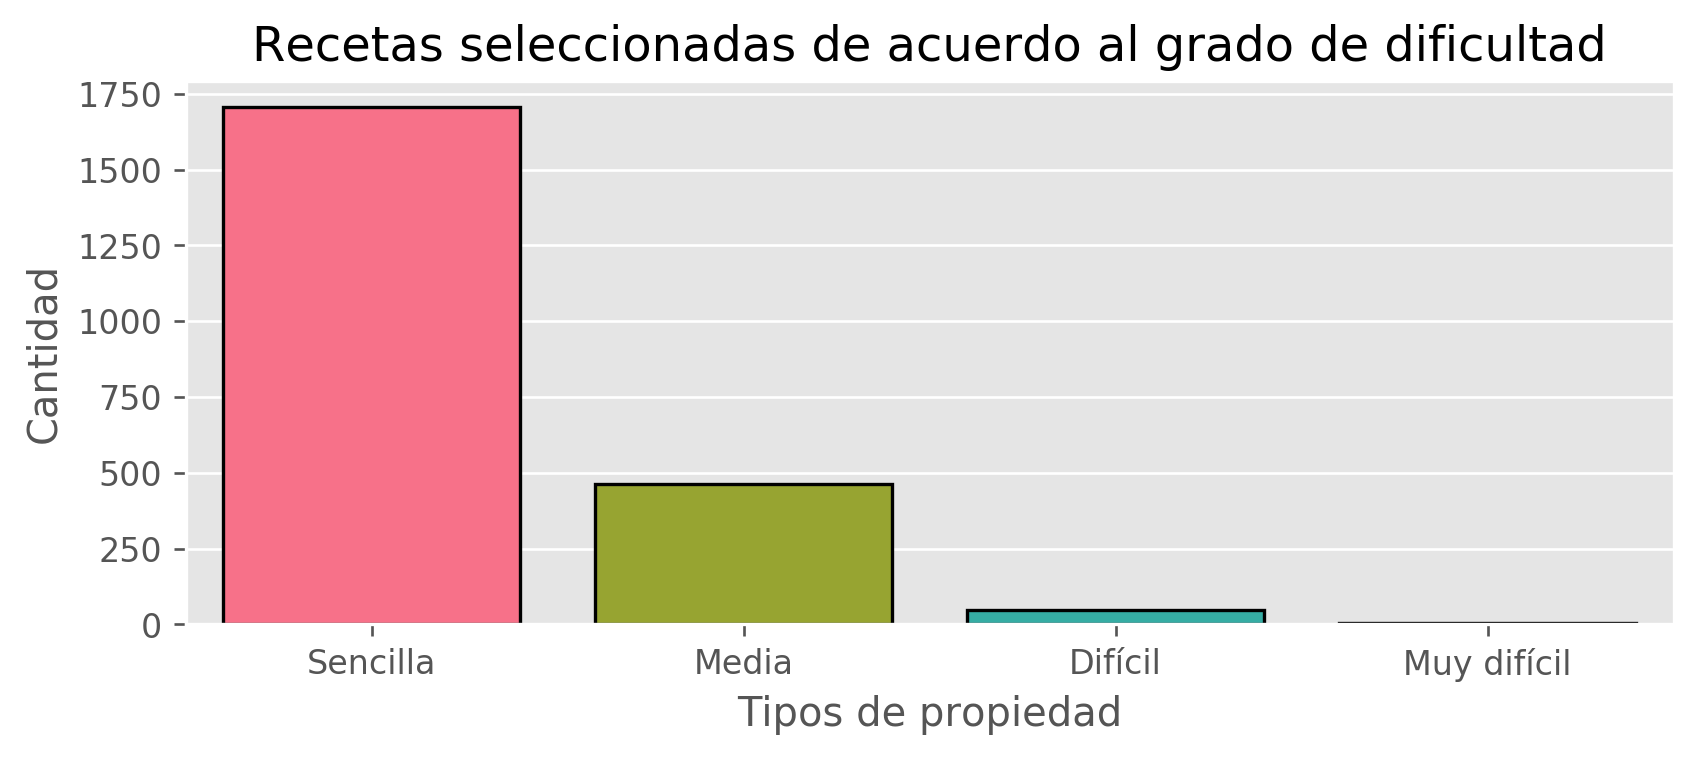

In [546]:
plt.figure(dpi=120,figsize=(8,3))
ax = sns.countplot(data = df, x = 'dificultad',order = df.dificultad.value_counts().index,saturation=1,linewidth=1,edgecolor=(0,0,0),palette="husl");
ax.set_title("Recetas seleccionadas de acuerdo al grado de dificultad")
ax.set_ylabel("Cantidad")
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
ax.set_xlabel("Tipos de propiedad");

Recetas seleccionadas de acuerdo a la categoria

In [527]:
df.categoria_principal.value_counts()

                 620
veraniegas       380
light            371
tradicionales    357
vegetarianas     208
exóticas         149
mediterráneas     40
invernales        39
minimalistas      35
para fiestas      23
Name: categoria_principal, dtype: int64

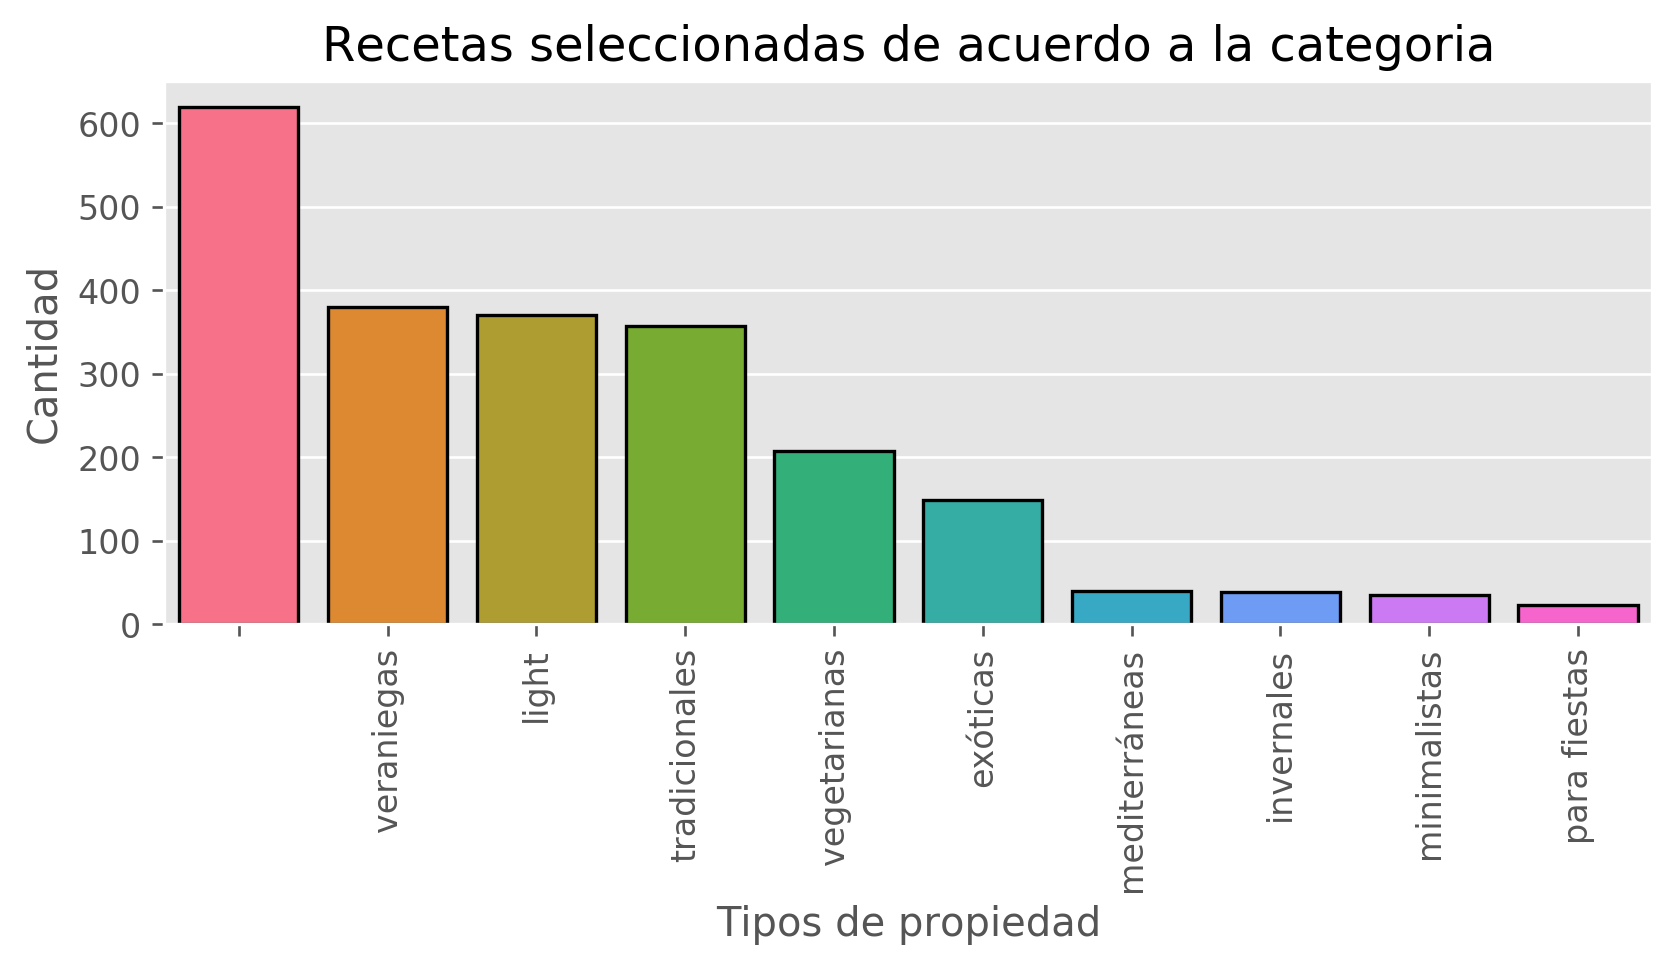

In [528]:
plt.figure(dpi=120,figsize=(8,3))
ax = sns.countplot(data = df, x = 'categoria_principal',order = df.categoria_principal.value_counts().index,saturation=1,linewidth=1,edgecolor=(0,0,0),palette="husl");
ax.set_title("Recetas seleccionadas de acuerdo a la categoria")
ax.set_ylabel("Cantidad")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_xlabel("Tipos de propiedad");

Principales ingredientes en todas las receta

In [541]:
ing = pd.read_excel('ingedientes2.xlsx')
ing.drop(['Unnamed: 0'], axis='columns', inplace=True)

In [543]:
ing_prin = ing.head(10)
ing_prin

,Ingrediente,Recetas
0,Huevo,922
1,Sal,836
2,Azúcar blanco,783
3,Aceite de oliva,663
4,Cebolla,497
5,Leche,408
6,Mantequilla,405
7,Ajo,394
8,Harina,371
9,Agua,330


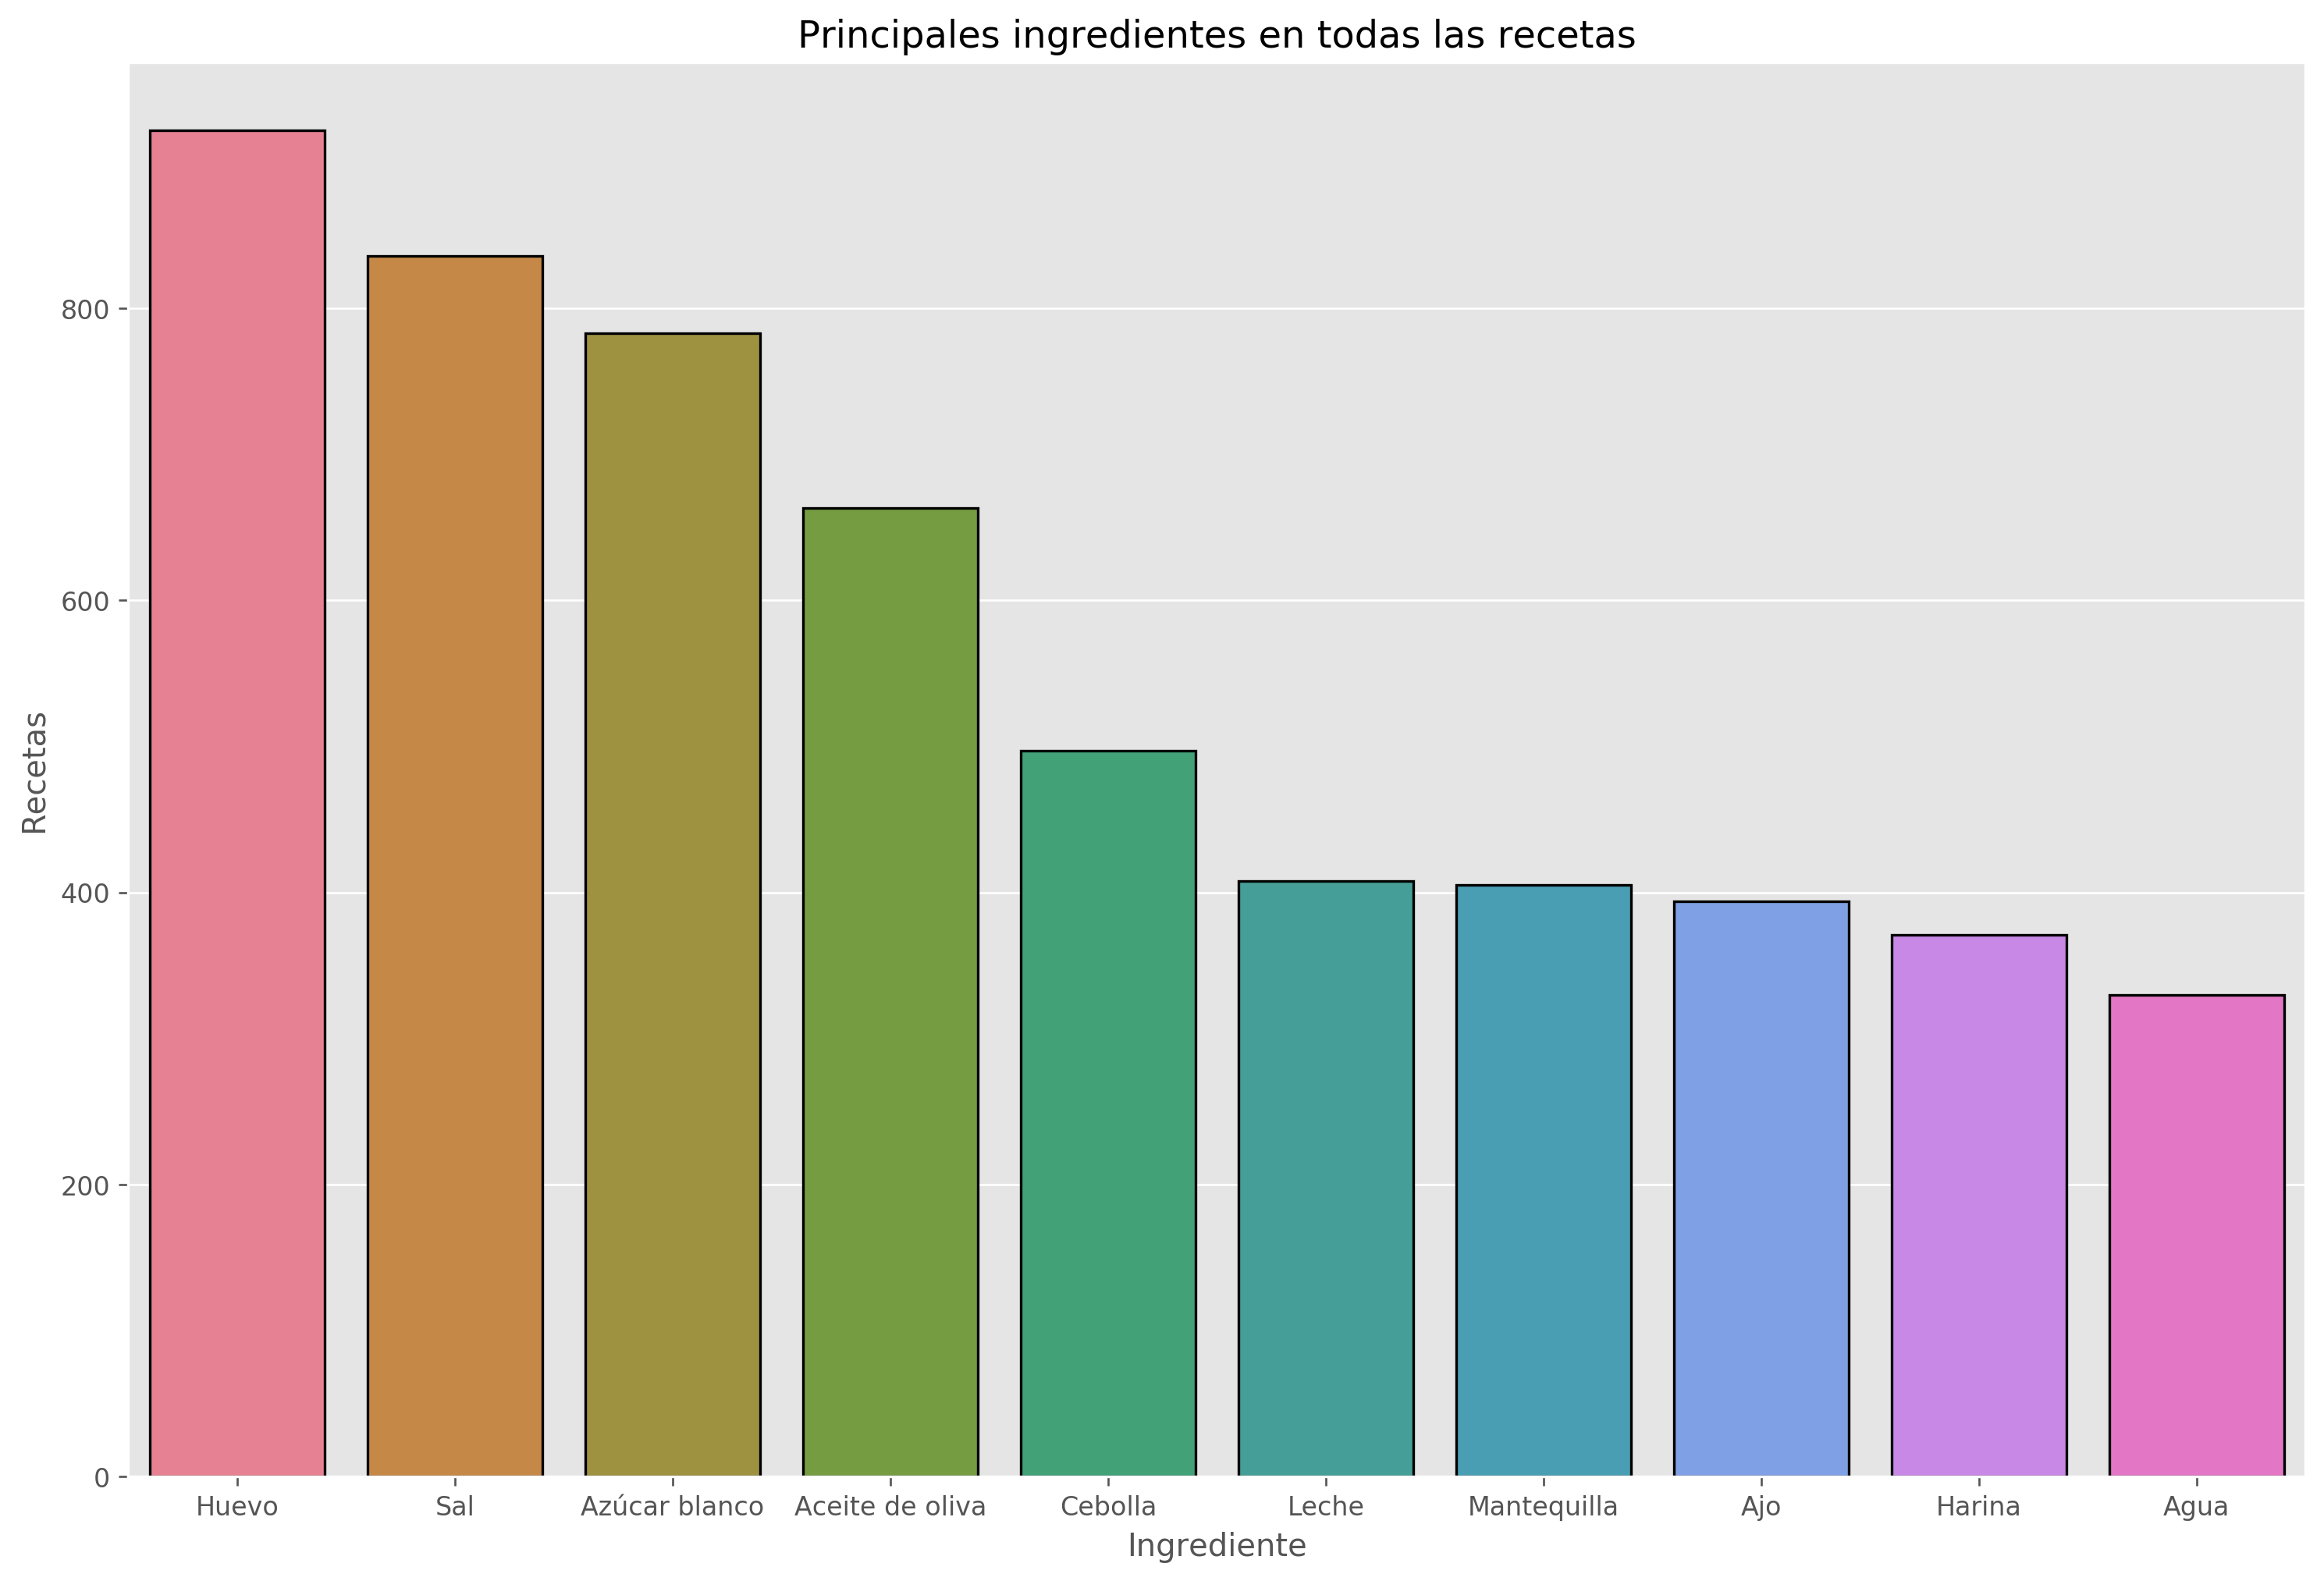

In [544]:
plt.figure(dpi=120,figsize=(15,10))
ax=sns.barplot(x='Ingrediente',  y="Recetas", data=ing_prin,linewidth=1,edgecolor=(0,0,0),palette="husl")
ax.set_title("Principales ingredientes en todas las recetas");